In [1]:
#importing necessary libraries

import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the data

insurance = pd.read_csv('insurance.csv')

### Data Exploration

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [9]:
insurance['smoker'] = insurance['smoker'].replace({'yes' : 1, 'no' : 0})

In [10]:
insurance['smoker'].head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [11]:
insurance.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


#### Encoding categorical variables

In [12]:
insurance['smoker'] = insurance['smoker'].replace({'yes' : 1, 'no' : 0})

In [13]:
insurance['sex'] = insurance['sex'].replace({'male' : 1, 'female' : 0})

In [14]:
insurance = pd.get_dummies(insurance, columns=['region'], dtype=int)

In [15]:
insurance.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [16]:
corr_insurance = insurance.corr(method='pearson')

<AxesSubplot:>

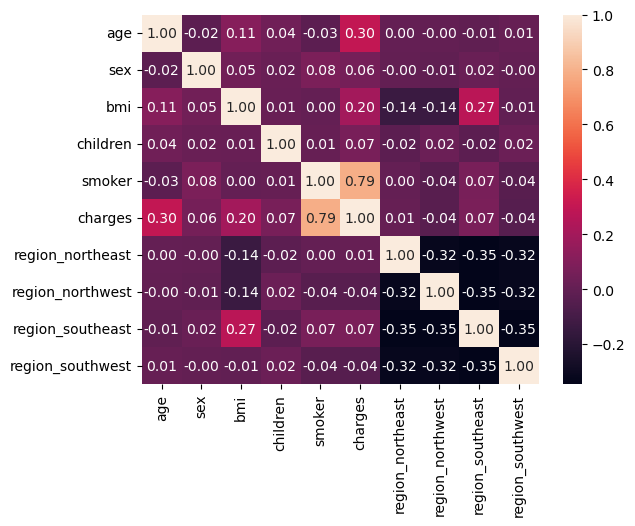

In [17]:

sns.heatmap(corr_insurance, annot=True, fmt=".2f")

#### Data visualization to futher explore and decide on feature selection

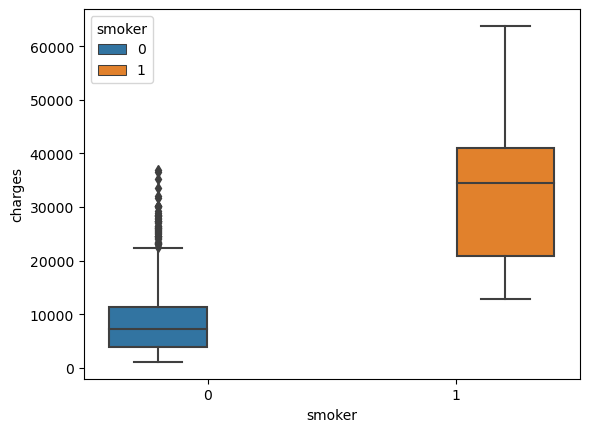

In [18]:
# Boxplots for categorical features
#plt.figure(figsize=(10,8))
sns.boxplot(data=insurance, x='smoker', y='charges', hue='smoker')
plt.show()

The above wide disparity between values of categorical variables makes the feature ideal for linear regression

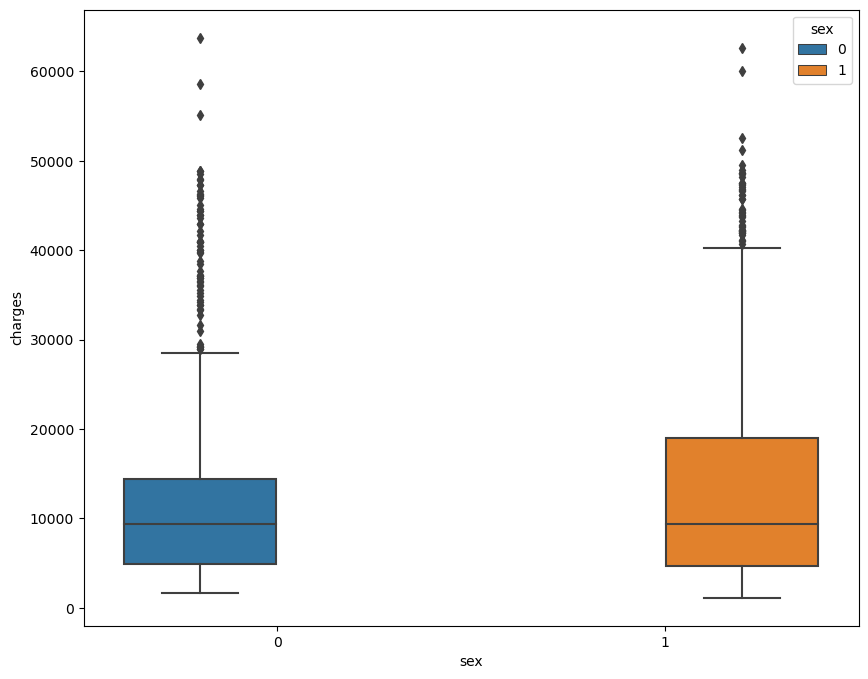

In [19]:
# Boxplots for categorical features
plt.figure(figsize=(10,8))
sns.boxplot(data=insurance, x='sex', y='charges', hue='sex')
plt.show()

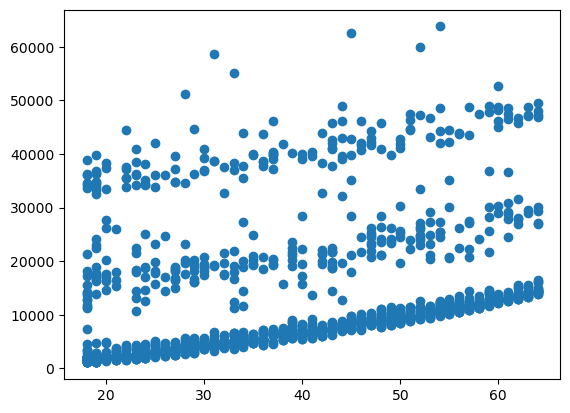

In [20]:
plt.scatter(data=insurance, x = 'age', y = 'charges')
plt.show()

The above scatterplot shows a positive linear relationship between charges and age, and would therefore be included in our feature selection

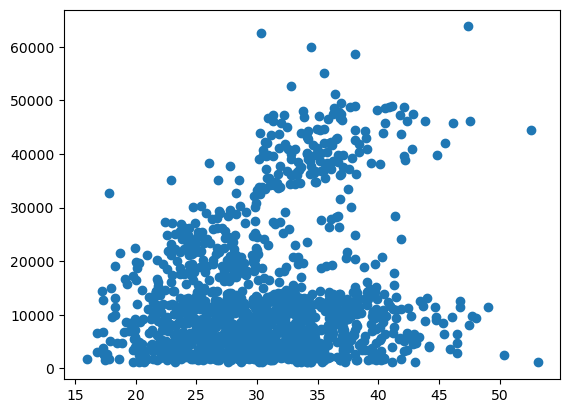

In [21]:
plt.scatter(data=insurance, x = 'bmi', y = 'charges')
plt.show()

### Feature selection


Age and smoker would be used as our predictor variables, as smoker shows a high positive correlation with our outcome variable (charges), while age shows a form of linear relationship with charges as evidenced in our scatterplot

<AxesSubplot:>

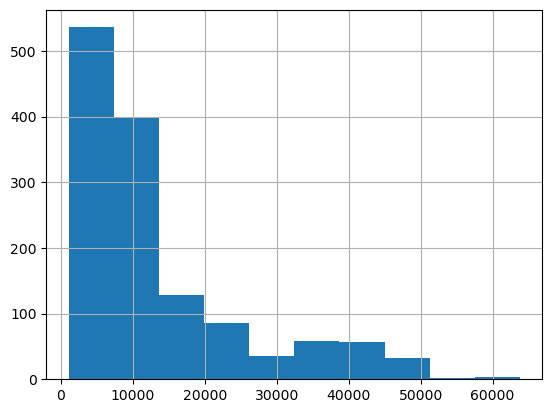

In [22]:
insurance['charges'].hist()

### Transforming the dependent variable

In [23]:
# logging the dependent variable to get it closer to a bell shape distribution

insurance['log_charges'] = np.log2(insurance['charges'])

<AxesSubplot:>

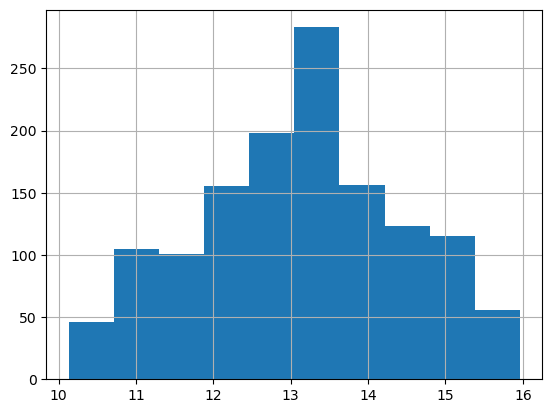

In [24]:
insurance['log_charges'].hist()

In [25]:
insurance.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,log_charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016,0.527834
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184,0.005632
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205,0.132669
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914,0.161336
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945,0.665506
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210,0.892964
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177,0.043115
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829,-0.017824
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265,0.015791
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000,-0.041632


### Model Building and Training


In [26]:
X = insurance[["age", "smoker"]]
y = insurance["log_charges"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_train_pred = model.predict(X_train)

In [36]:
y_test_pred = model.predict(X_test)

### Model Evaluation

In [37]:
model.coef_

array([0.05095892, 2.25322038])

In [33]:
#r2 = r2_score(y_test, y_test_pred)


In [39]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_mse

0.4809632206571297

In [40]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_mse

0.3687293274259835

In [42]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_rmse

0.6935151192707552

In [43]:
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_rmse

0.6072308683079143

In [48]:
r2 = r2_score(y_train, y_train_pred)
r2

0.7322143876618108

The train and test mse are quite close with the test mse lesser than the former. This suggests that the model is not overfitting. An R2 score of 73% indicates that the model can explain 34% of the variation in the log-insurance charges. 